In [18]:
import pandas as pd 

df = pd.read_csv("C:/Fares Data/University/Samsung X LifeMakers Internship/Project Capstone 2/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# **Important Preprocessing Steps - Step 0 :**
### - Fixing Fake Zeroes Problem

### - Encoding Categorical Features

### - Scaling Numerical Features

In [ ]:
# Add missing flags for RestingBP and Cholesterol
df['RestingBP_missing'] = (df['RestingBP'] == 0).astype(int)
df['Cholesterol_missing'] = (df['Cholesterol'] == 0).astype(int)

df[['RestingBP', 'Cholesterol', 'RestingBP_missing', 'Cholesterol_missing']].head(10)

,RestingBP,Cholesterol,RestingBP_missing,Cholesterol_missing
0,140,289,0,0
1,160,180,0,0
2,130,283,0,0
3,138,214,0,0
4,150,195,0,0
5,120,339,0,0
6,130,237,0,0
7,110,208,0,0
8,140,207,0,0
9,120,284,0,0


In [21]:
print((df[['RestingBP','Cholesterol']] == 0).sum())

RestingBP        1
Cholesterol    172
dtype: int64


In [ ]:
# Impute zeros in RestingBP and Cholesterol with median of non-zero values

restingbp_median = df.loc[df['RestingBP'] != 0, 'RestingBP'].median()
cholesterol_median = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].median()

df.loc[df['RestingBP'] == 0, 'RestingBP'] = restingbp_median
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median

print("RestingBP median used:", restingbp_median)
print("Cholesterol median used:", cholesterol_median)
print("Remaining zero counts:")
print((df[['RestingBP','Cholesterol']] == 0).sum())

RestingBP median used: 130.0
Cholesterol median used: 237.0
Remaining zero counts:
RestingBP      0
Cholesterol    0
dtype: int64


In [ ]:
# Check which columns are categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    print(f"\n{col} -> {df[col].unique()}")

Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Sex -> ['M' 'F']

ChestPainType -> ['ATA' 'NAP' 'ASY' 'TA']

RestingECG -> ['Normal' 'ST' 'LVH']

ExerciseAngina -> ['N' 'Y']

ST_Slope -> ['Up' 'Flat' 'Down']


In [ ]:
# Encode categorical features

from sklearn.preprocessing import LabelEncoder

df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

print("New dataframe shape:", df.shape)
df.head()

New dataframe shape: (918, 18)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,RestingBP_missing,Cholesterol_missing,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,0,0,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,0,0,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,0,0,False,True,False,True,False,False,True


In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("X_scaled shape:", X_scaled.shape)
print("First 5 rows after scaling:\n", X_scaled[:5])

X_scaled shape: (918, 17)
First 5 rows after scaling:
 [[-1.4331398   0.51595242  0.41500214  0.85803479 -0.55134134  1.38292822
  -0.8235563  -0.83243239 -0.03302291 -0.48016976  2.07517671 -0.53283777
  -0.22967867  0.81427482 -0.49044933 -1.00218103  1.15067399]
 [-0.47848359 -1.93816322  1.52732903 -1.1842268  -0.55134134  0.75415714
  -0.8235563   0.10566353 -0.03302291 -0.48016976 -0.48188667  1.87674385
  -0.22967867  0.81427482 -0.49044933  0.99782372 -0.86905588]
 [-1.75135854  0.51595242 -0.14116131  0.74561672 -0.55134134 -1.52513802
  -0.8235563  -0.83243239 -0.03302291 -0.48016976  2.07517671 -0.53283777
  -0.22967867 -1.22808661  2.03894663 -1.00218103  1.15067399]
 [-0.5845565  -1.93816322  0.30376945 -0.54719107 -0.55134134 -1.13215609
   1.21424608  0.57471149 -0.03302291 -0.48016976 -0.48188667 -0.53283777
  -0.22967867  0.81427482 -0.49044933  0.99782372 -0.86905588]
 [ 0.05188098  0.51595242  0.97116558 -0.90318163 -0.55134134 -0.5819814
  -0.8235563  -0.83243239 -0

In [26]:
!pip install matplotlib seaborn


In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Class distribution in train:", y_train.value_counts(normalize=True).round(3).to_dict())
print("Class distribution in test:", y_test.value_counts(normalize=True).round(3).to_dict())

Training set shape: (734, 17) (734,)
Testing set shape: (184, 17) (184,)
Class distribution in train: {1: 0.553, 0: 0.447}
Class distribution in test: {1: 0.554, 0: 0.446}


In [59]:
# Important Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# **Naive Bayes baseline**

=== Classification report ===

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



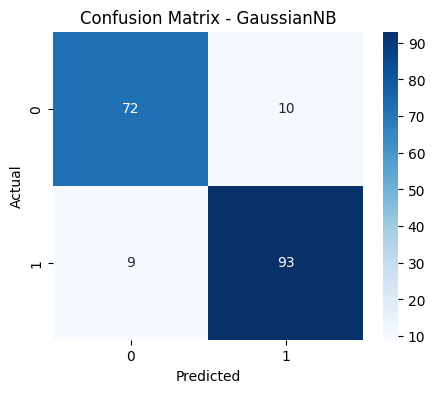

ROC AUC: 0.9330



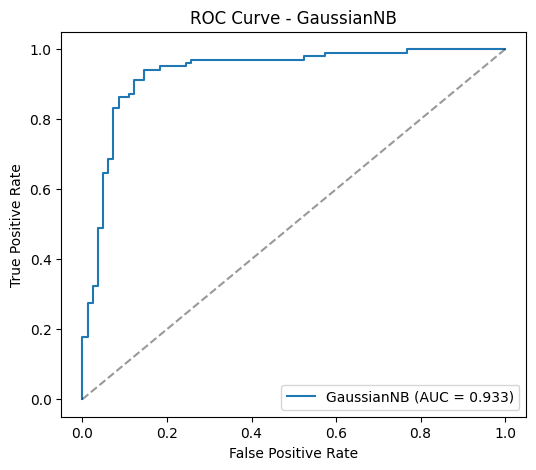

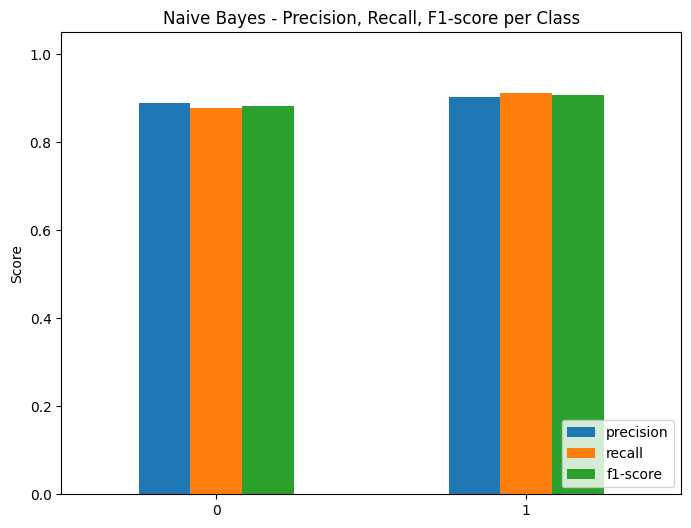

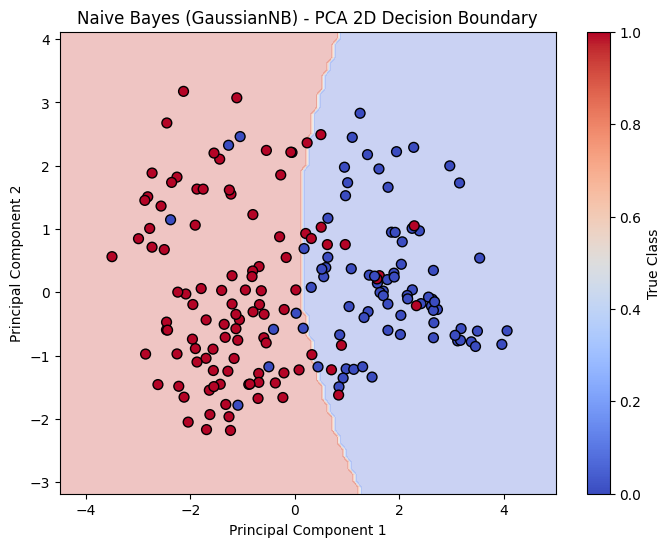

In [ ]:
# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
y_proba = gnb.predict_proba(X_test)[:, 1] if hasattr(gnb, "predict_proba") else None
acc_nb = accuracy_score(y_test, y_pred)

# Print classification report
print("=== Classification report ===\n")
print(classification_report(y_test, y_pred))

# Confusion matrix (raw counts)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GaussianNB')
plt.show()

# ROC AUC and ROC curve (if probabilities available)
if y_proba is not None:
    try:
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC: {auc:.4f}\n")
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f'GaussianNB (AUC = {auc:.3f})')
        plt.plot([0,1],[0,1],'k--', alpha=0.4)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - GaussianNB')
        plt.legend()
        plt.show()
    except Exception as e:
        print("ROC AUC could not be computed:", e)
else:
    print("predict_proba not available for this estimator.")

# === Visualization of Precision, Recall, F1-score ===
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # only classes 0 and 1

metrics_df.plot(kind='bar', figsize=(8,6))
plt.title("Naive Bayes - Precision, Recall, F1-score per Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# === PCA Visualization (like Logistic Regression 2D plot) ===
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit Naive Bayes on PCA-reduced training data
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

# Decision boundary grid
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = gnb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Naive Bayes (GaussianNB) - PCA 2D Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Class")
plt.show()


# **Logistic Regression**

=== Classification report (Logistic Regression) ===

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        82
           1       0.89      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



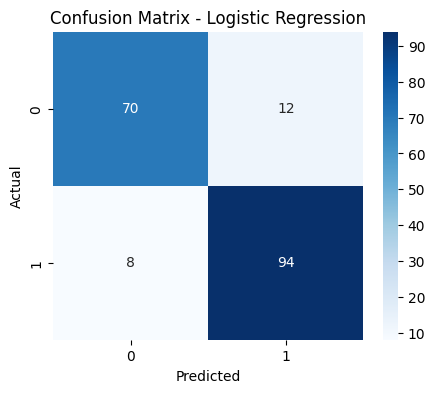

ROC AUC: 0.9327



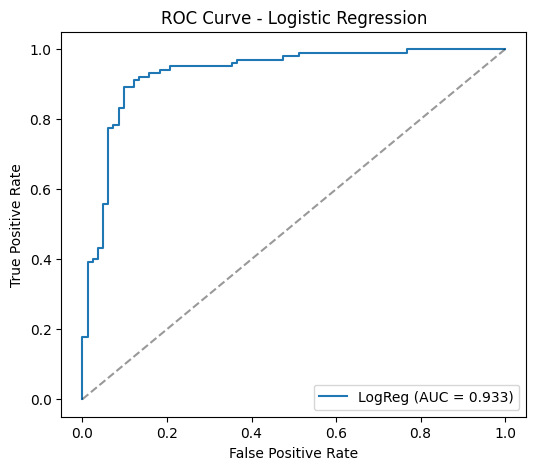

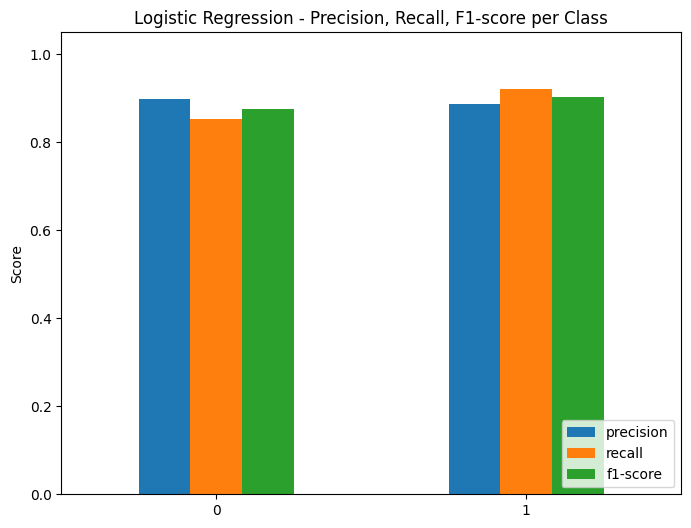

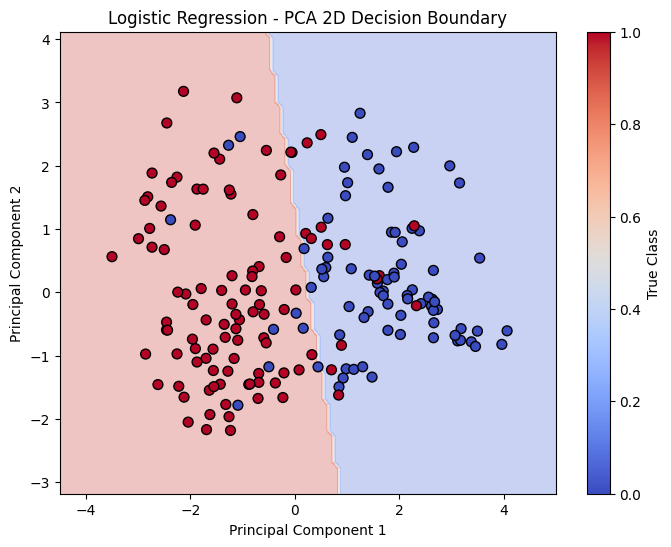

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # solver=liblinear works well for small datasets
log_reg.fit(X_train, y_train)

# Predictions and probabilities
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]
acc_lr = accuracy_score(y_test, y_pred_lr)

# Print classification report
print("=== Classification report (Logistic Regression) ===\n")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix (raw counts)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC AUC and ROC curve
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"ROC AUC: {auc_lr:.4f}\n")
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'LogReg (AUC = {auc_lr:.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# === Visualization of Precision, Recall, F1-score ===
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
metrics_df_lr = pd.DataFrame(report_lr).transpose().iloc[:2, :3]  # only classes 0 and 1

metrics_df_lr.plot(kind='bar', figsize=(8,6))
plt.title("Logistic Regression - Precision, Recall, F1-score per Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# Reduce data to 2D with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression on PCA-reduced data
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)

# Decision boundary grid
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = logreg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary + test points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Logistic Regression - PCA 2D Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Class")
plt.show()


# **K-Nearest Neighbors**

=== Classification report (KNN) ===

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        82
           1       0.92      0.94      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



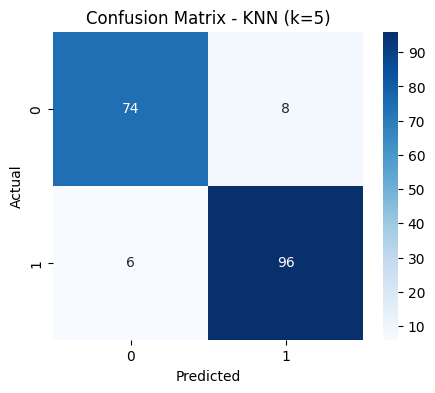

ROC AUC: 0.9427



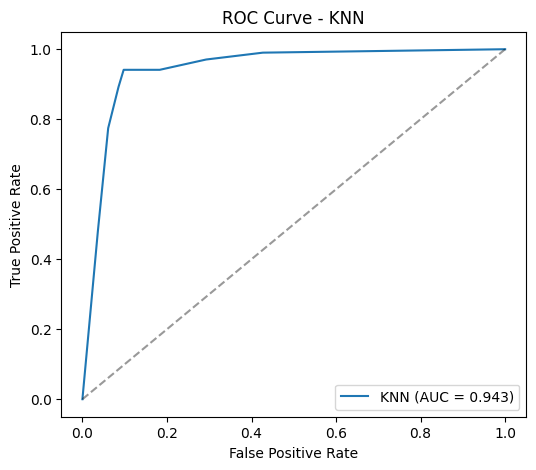

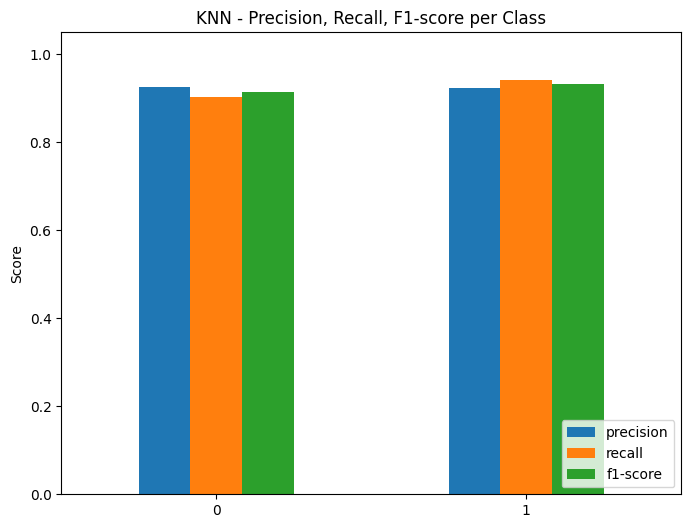

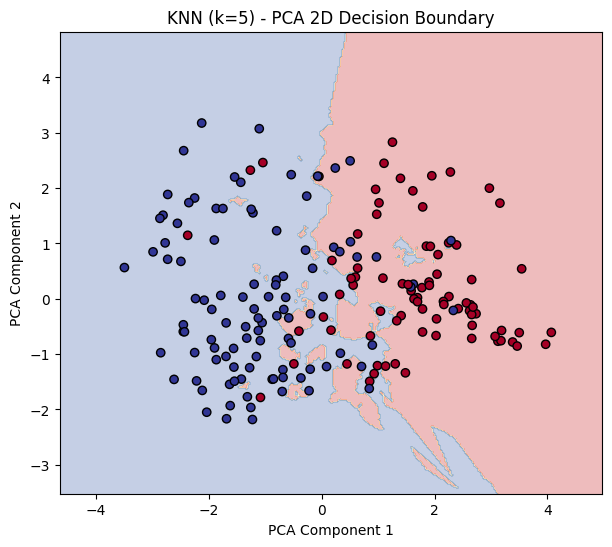

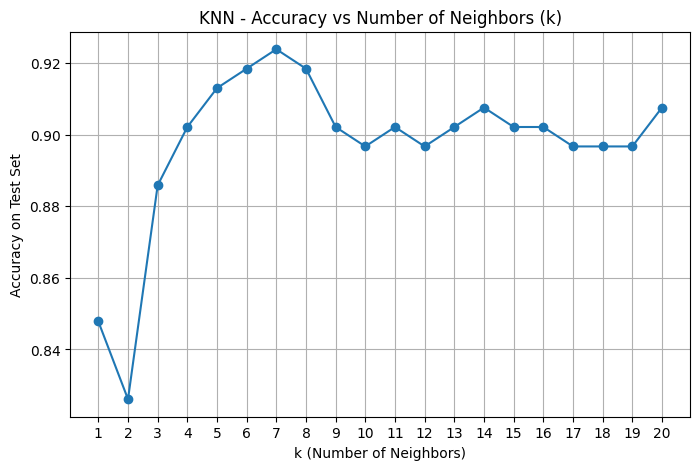

In [60]:
# Train KNN (k=5 baseline)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predictions and probabilities
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]
acc_knn = accuracy_score(y_test, y_pred)

# === Classification report ===
print("=== Classification report (KNN) ===\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (k=5)')
plt.show()

# ROC AUC and ROC curve
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.4f}\n")
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

# === Visualization of Precision, Recall, F1-score ===
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # only classes 0 and 1

metrics_df.plot(kind='bar', figsize=(8,6))
plt.title("KNN - Precision, Recall, F1-score per Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# === PCA 2D Decision Boundary Visualization ===
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("KNN (k=5) - PCA 2D Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# === Accuracy vs K Curve ===
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN - Accuracy vs Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()


# **Support Vector Machine**


=== SVM with linear kernel ===

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



<Figure size 700x600 with 0 Axes>

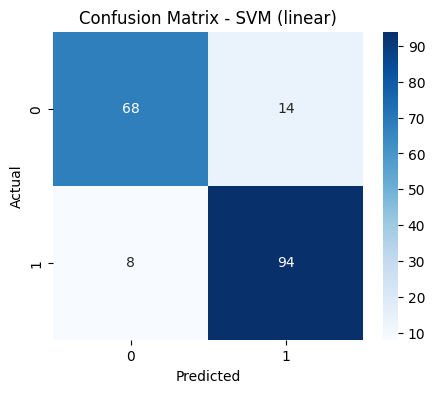

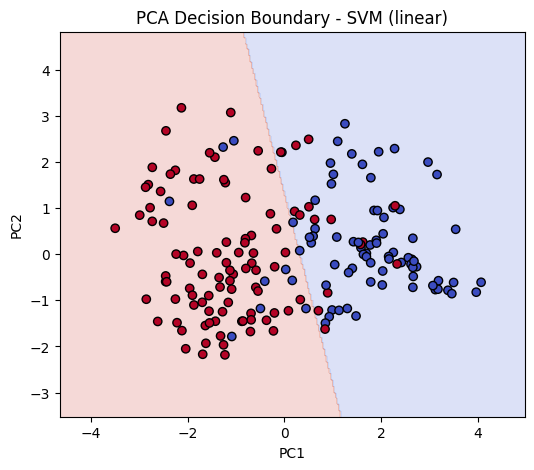


=== SVM with poly kernel ===

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



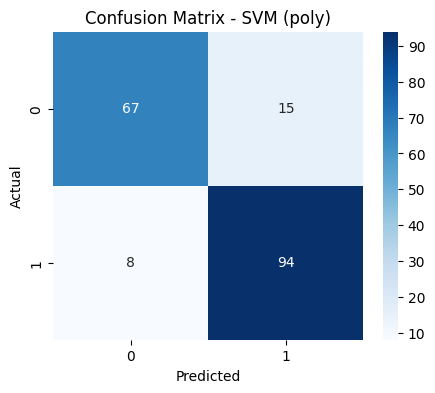

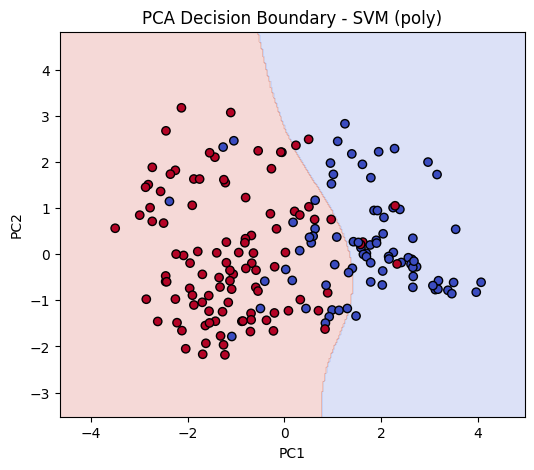


=== SVM with rbf kernel ===

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



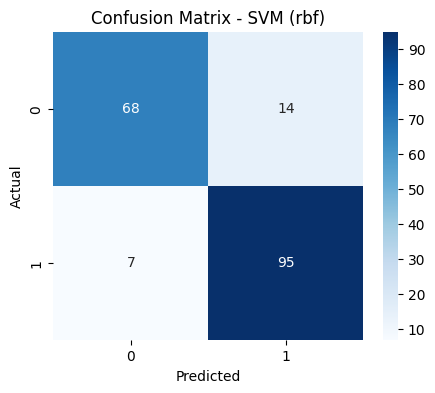

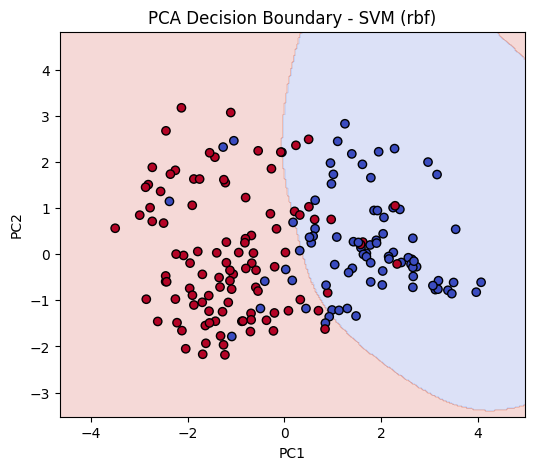


=== SVM with sigmoid kernel ===

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



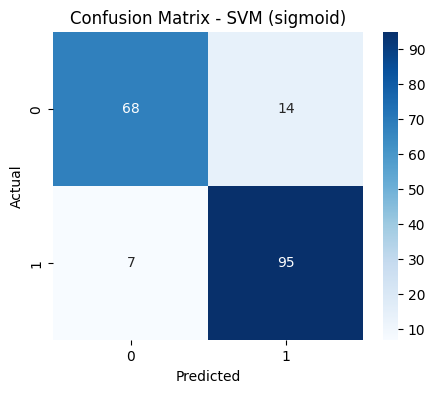

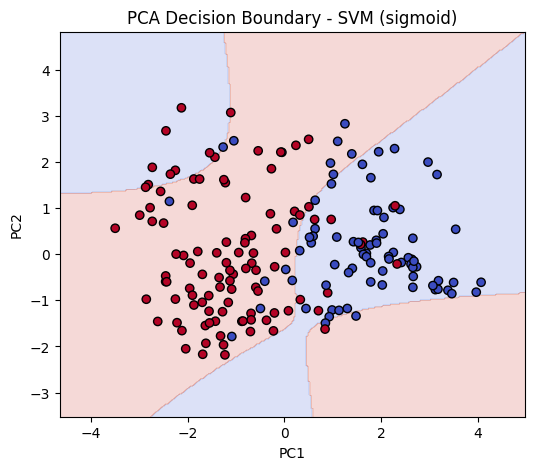

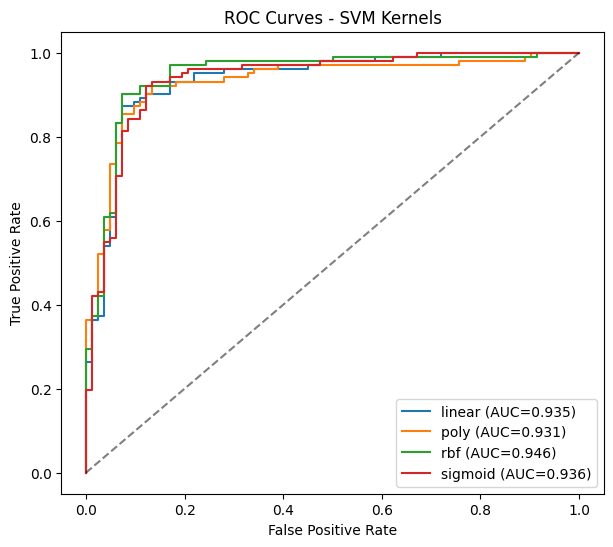

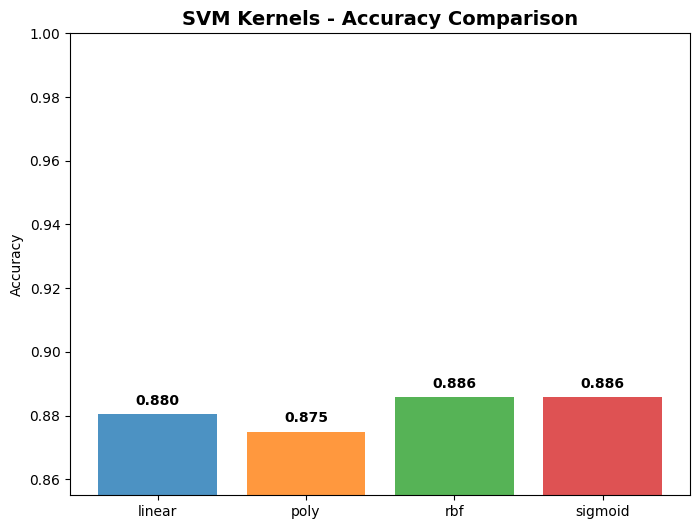

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
roc_curves = {}

plt.figure(figsize=(7,6))

for kernel in kernels:
    print(f"\n=== SVM with {kernel} kernel ===\n")
    
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    y_proba = svm.predict_proba(X_test)[:, 1]
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - SVM ({kernel})")
    plt.show()
    
    # ROC curve
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[kernel] = (fpr, tpr, auc)
    
    # PCA decision boundary
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    svm_pca = SVC(kernel=kernel, probability=True, random_state=42)
    svm_pca.fit(X_train_pca, y_train)
    
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"PCA Decision Boundary - SVM ({kernel})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

# === Combined ROC curve ===
plt.figure(figsize=(7,6))
for kernel, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{kernel} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - SVM Kernels")
plt.legend()
plt.show()

# === Improved Accuracy Comparison Plot ===
plt.figure(figsize=(8,6))

bars = plt.bar(results.keys(), results.values(), 
               color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'], alpha=0.8)

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.3f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Zoom y-axis for expressiveness
plt.ylim(min(results.values())-0.02, 1.0)

plt.title("SVM Kernels - Accuracy Comparison", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy")
plt.show()



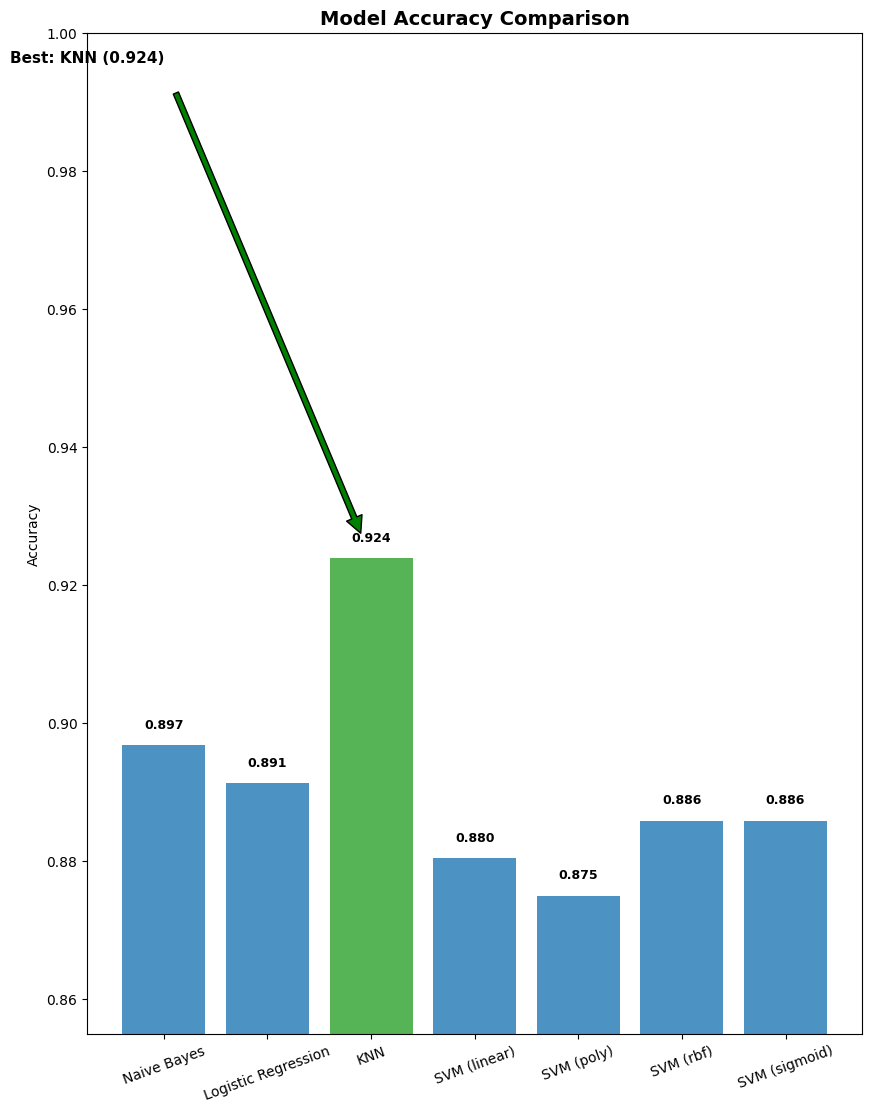

In [61]:
# === Accuracy Comparison Across All Models ===
all_results = {
    "Naive Bayes": acc_nb,        
    "Logistic Regression": acc_lr, 
    "KNN": acc_knn,               
    "SVM (linear)": results["linear"],
    "SVM (poly)": results["poly"],
    "SVM (rbf)": results["rbf"],
    "SVM (sigmoid)": results["sigmoid"]
}

# Find best model
best_model = max(all_results, key=all_results.get)
best_acc = all_results[best_model]

plt.figure(figsize=(10,13))
bars = plt.bar(all_results.keys(), all_results.values(),
               color=['#1f77b4' if model != best_model else '#2ca02c' 
                      for model in all_results.keys()],
               alpha=0.8)

# Add labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.3f}", 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Zoom for clarity
plt.ylim(min(all_results.values())-0.02, 1.0)

plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)

# Highlight best model
plt.annotate(f"Best: {best_model} ({best_acc:.3f})",
             xy=(list(all_results.keys()).index(best_model), best_acc),
             xytext=(0, 0.97),
             textcoords='axes fraction',
             ha='center', fontsize=11, fontweight='bold',
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.show()
